In [35]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


In [43]:
ca = pd.read_excel('Historical.xlsx')
ca['Log State Highway VMT'] = np.log(ca['State Highway VMT'])
ca['Log State Highway Lane Miles'] = np.log(ca['State Highway Lane Miles'])
ca['Log Population'] = np.log(ca['Population'])
ca['Log Per Capita Income'] = np.log(ca['Per Capita Income'])
ca['Log Total Personal Income'] = np.log(ca['Total Personal Income'])
ca['Log Unemployment Rate'] = np.log(ca['Unemployment Rate'])

# ca = ca[ca['Year'] >= 1976]
# ca = ca[(ca['Year'] >= 1976) & (ca['Year'] <= 1997)]
ca.columns = ca.columns.str.replace(' ', '_')
print(ca.to_string())

      Year  Non-State_Roads_VMT  State_Highway_VMT  California_VMT  State_Highway_Maintained_Miles  State_Highway_Lane_Miles  Population  Per_Capita_Income  Total_Personal_Income  Unemployment_Rate  Gallons_of_Motor_Fuel  National_Fuel_Economy  National_Retail_Fuel_Prices  VMT_Proportion  VMT_Prediction  Log_State_Highway_VMT  Log_State_Highway_Lane_Miles  Log_Population  Log_Per_Capita_Income  Log_Total_Personal_Income  Log_Unemployment_Rate
0   1950.0                  NaN                NaN             NaN                    13721.800000              30708.300000   10677.000             1947.0           2.078812e+07                NaN           3.202276e+09                    NaN                          NaN             NaN             NaN                    NaN                     10.332288        9.275847               7.574045                  16.849892                    NaN
1   1951.0                  NaN                NaN             NaN                    13715.700000        

In [40]:
ca = ca[ca['Year'] >= 1963]

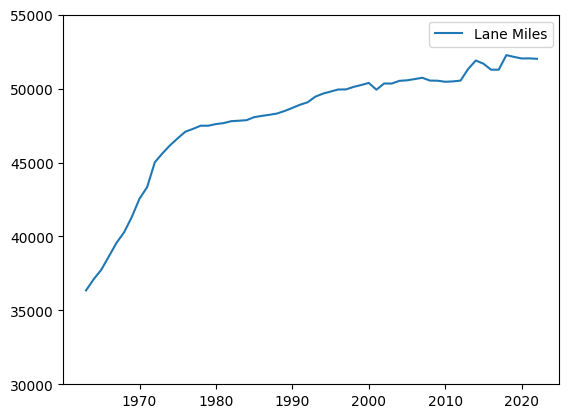

In [41]:
plt.plot(ca['Year'], ca['State_Highway_Lane_Miles'], label = 'Lane Miles')
# plt.plot(ca['Year'], ca['State_Highway_Maintained_Miles'], label = 'Maintained Miles')
plt.ylim(30000, 55000)
plt.legend()

In [5]:
ca['Poly'] = np.log(ca['State_Highway_Lane_Miles']**2)
ca['Interaction'] = ca['Log_Population'] * ca['Log_State_Highway_Lane_Miles']

coef: [ 2.93354002  1.52526824 -0.42159507]
int: -16.90924
r^2: 0.99597


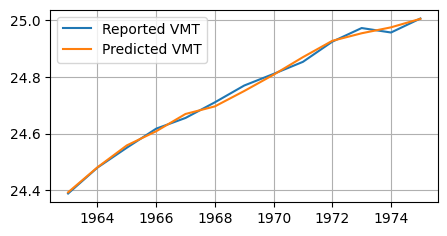

Coefficients of Entire CA


,total_pop_coef,total_lane_miles_coef,total_income_coef,r^2
0,2.93354,1.525268,-0.421595,0.99597


In [45]:
ca = ca[(ca['Year'] >= 1963) & (ca['Year'] <= 1975)]

coef_list = []
r2_list = []

X = ca[['Log_Population',
        'Log_State_Highway_Lane_Miles',
        'Log_Per_Capita_Income',
        # 'Poly'
        ]]

logmodel = LinearRegression()
logmodel.fit(X, ca['Log_State_Highway_VMT'])

coef_list.append(logmodel.coef_.tolist())
r2_list.append(round(logmodel.score(X, ca['Log_State_Highway_VMT']), 5))

print('coef:', logmodel.coef_)
print('int:', round(logmodel.intercept_, 5))
print('r^2:', round(logmodel.score(X, ca['Log_State_Highway_VMT']), 5))

plt.figure(figsize=(5,2.5))
plt.plot(ca['Year'], ca['Log_State_Highway_VMT'], label = 'Reported VMT')
plt.plot(ca['Year'], logmodel.predict(X), label = 'Predicted VMT')
plt.grid()
plt.legend()
plt.show()

coef_df = pd.DataFrame(coef_list, columns=['total_pop_coef', 'total_lane_miles_coef', 'total_income_coef'])
coef_df['r^2'] = r2_list

print('Coefficients of Entire CA')
coef_df

In [7]:
ca

,Year,Non-State_Roads_VMT,State_Highway_VMT,California_VMT,State_Highway_Maintained_Miles,State_Highway_Lane_Miles,Population,Per_Capita_Income,Total_Personal_Income,Unemployment_Rate,...,VMT_Proportion,VMT_Prediction,Log_State_Highway_VMT,Log_State_Highway_Lane_Miles,Log_Population,Log_Per_Capita_Income,Log_Total_Personal_Income,Log_Unemployment_Rate,Poly,Interaction
34,1984.0,9.370000e+10,1.023000e+11,1.960000e+11,15184.5,47863.9,25844.393,15877.0,4.103314e+08,7.7,...,0.521939,1.377122e+11,25.351176,10.776117,10.159849,9.672627,19.832476,2.041220,21.552234,109.483719
35,1985.0,1.008000e+11,1.068000e+11,2.076000e+11,15182.1,48068.5,26441.109,16788.0,4.438933e+08,7.2,...,0.514451,1.383645e+11,25.394224,10.780382,10.182675,9.728420,19.911095,1.974081,21.560765,109.773132
36,1986.0,1.025000e+11,1.124000e+11,2.149000e+11,15183.2,48154.9,27102.237,17581.0,4.764844e+08,6.8,...,0.523034,1.520636e+11,25.445330,10.782178,10.207372,9.774574,19.981946,1.916923,21.564356,110.057699
37,1987.0,1.046000e+11,1.217000e+11,2.263000e+11,15166.2,48227.4,27777.158,18418.0,5.115997e+08,5.8,...,0.537782,1.643686e+11,25.524825,10.783683,10.231969,9.821084,20.053053,1.757858,21.567365,110.338309
38,1988.0,1.131000e+11,1.285000e+11,2.416000e+11,15169.5,48314.8,28464.249,19590.0,5.576146e+08,5.3,...,0.531871,1.670139e+11,25.579195,10.785493,10.256404,9.882775,20.139179,1.667707,21.570986,110.620377
39,1989.0,1.169000e+11,1.344000e+11,2.513000e+11,15173.7,48489.3,29218.164,20542.0,6.001995e+08,5.1,...,0.534819,1.707658e+11,25.624086,10.789098,10.282546,9.930227,20.212773,1.629241,21.578197,110.939399
40,1990.0,1.198000e+11,1.392000e+11,2.590000e+11,15170.5,48693.3,29950.111,21483.0,6.434182e+08,5.8,...,0.537452,1.670433e+11,25.659178,10.793297,10.307288,9.975017,20.282306,1.757858,21.586593,111.249621
41,1991.0,1.186000e+11,1.397000e+11,2.583000e+11,15172.7,48908.1,30414.114,21877.0,6.653696e+08,7.8,...,0.540844,1.679306e+11,25.662763,10.797698,10.322662,9.993191,20.315853,2.054124,21.595397,111.460991
42,1992.0,1.172000e+11,1.417000e+11,2.589000e+11,15166.6,49075.7,30875.920,22664.0,6.997719e+08,9.4,...,0.547316,1.779923e+11,25.676978,10.801119,10.337732,10.028533,20.366265,2.240710,21.602239,111.659075
43,1993.0,1.241000e+11,1.423000e+11,2.664000e+11,15189.3,49452.2,31147.208,22990.0,7.160743e+08,9.5,...,0.534159,1.679099e+11,25.681203,10.808762,10.346480,10.042815,20.389295,2.251292,21.617524,111.832637


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices('State_Highway_VMT ~ State_Highway_Lane_Miles + Population + Per_Capita_Income', data=ca, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,46055.268706,Intercept
1,18.606486,State_Highway_Lane_Miles
2,20.669301,Population
3,15.416844,Per_Capita_Income


coef: [-7055862.35186221  9921164.6392183    -51305.41004241]
int: 185608887226.54236
r^2: 0.99073


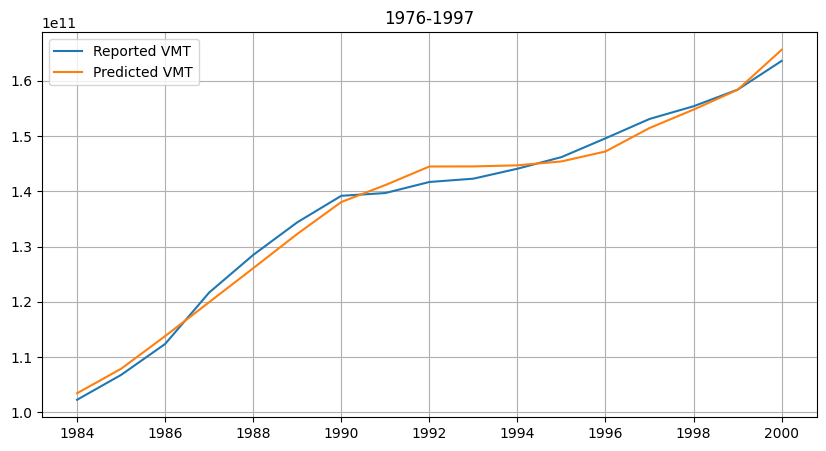

In [9]:
ca =ca = ca[ca['Year'] >= 1966]
X = ca[['State_Highway_Lane_Miles',
        'Population', 
        'Per_Capita_Income'
        # 'Total_Personal_Income',
        # 'Unemployment_Rate'
        ]]

model = LinearRegression()
model.fit(X, ca['State_Highway_VMT'])
print('coef:', model.coef_)
print('int:', round(model.intercept_, 5))
print('r^2:', round(model.score(X, ca['State_Highway_VMT']), 5))

plt.figure(figsize=(10,5))
plt.plot(ca['Year'], ca['State_Highway_VMT'], label = 'Reported VMT')
plt.plot(ca['Year'], model.predict(X), label = 'Predicted VMT')
plt.grid()
plt.title('1976-1997')
plt.legend()
plt.show()


In [10]:
# get y and X dataframes based on this regression
y, X = dmatrices('State_Highway_VMT ~ State_Highway_Lane_Miles + Population + Per_Capita_Income + Total_Personal_Income', data=ca, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,63387.712027,Intercept
1,19.031379,State_Highway_Lane_Miles
2,32.627787,Population
3,2467.430352,Per_Capita_Income
4,2860.759697,Total_Personal_Income
